In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Path setup ---

# Get root project folder (one level up from notebooks/)
root_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add root_dir to sys.path so Python can find 'src'
if root_dir not in sys.path:
    sys.path.insert(0, root_dir)

# Define data directory and file paths
data_dir = os.path.join(root_dir, "data")
raw_path = os.path.join(data_dir, "raw_complaints.csv")
filtered_path = os.path.join(data_dir, "filtered_complaints.csv")

# Ensure the data directory exists
os.makedirs(data_dir, exist_ok=True)

In [2]:
from src.data_loader import load_raw_data, filter_target_products, remove_empty_narratives
from src.text_cleaner import apply_cleaning

In [3]:
print(f"✅ Loading raw data from {raw_path}")
df = pd.read_csv(raw_path)
print(f"✅ Loaded {len(df)} rows from {raw_path}")

✅ Loading raw data from C:\Users\Admin\Desktop\KAIM\Week 6\intelligent-complaint-analysis\data\raw_complaints.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_1344\3898672339.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(raw_path)


✅ Loaded 1048575 rows from C:\Users\Admin\Desktop\KAIM\Week 6\intelligent-complaint-analysis\data\raw_complaints.csv


In [21]:
df = load_raw_data(raw_path)

C:\Users\Admin\Desktop\KAIM\Week 6\intelligent-complaint-analysis\src\data_loader.py:15: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Loaded 1048575 rows.


In [22]:
df = filter_target_products(df)
df = remove_empty_narratives(df)
df = apply_cleaning(df)

Filtered to 17512 rows across target products.
5018 rows remaining after removing empty narratives.


In [23]:
# Save the cleaned dataframe
df.to_csv(filtered_path, index=False)
print(f"✅ Cleaned data saved to {filtered_path}")

✅ Cleaned data saved to C:\Users\Admin\Desktop\KAIM\Week 6\intelligent-complaint-analysis\data\filtered_complaints.csv


In [24]:
# Add word count column for analysis
df["word_count"] = df["cleaned_narrative"].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

C:\Users\Admin\AppData\Local\Temp\ipykernel_7264\1881738877.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="Product", order=df["Product"].value_counts().index, palette="Blues_r")


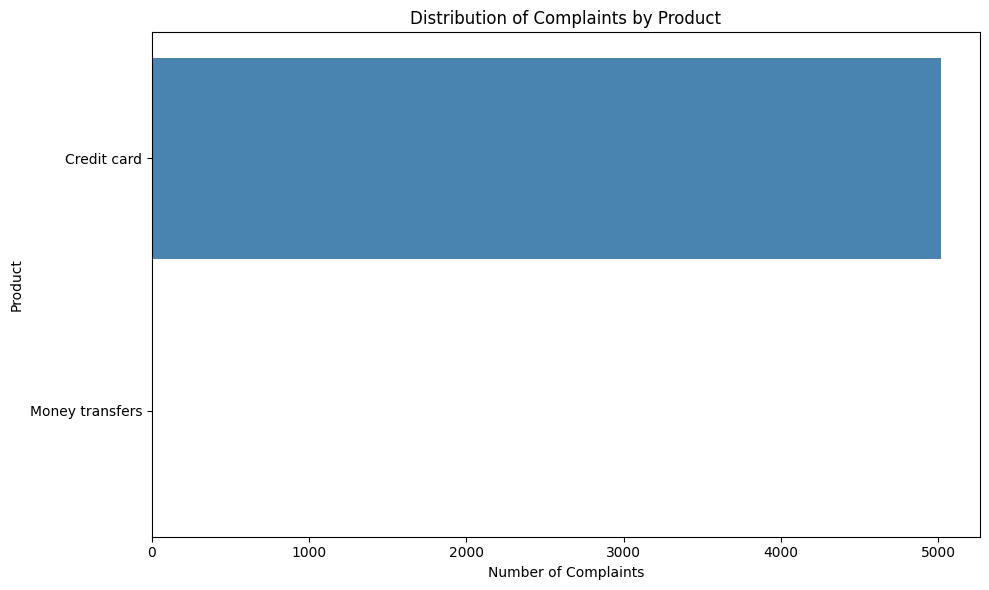

In [25]:
# 📈 Plot 1: Complaint Distribution by Product
plt.figure(figsize=(10,6))
sns.countplot(data=df, y="Product", order=df["Product"].value_counts().index, palette="Blues_r")
plt.title("Distribution of Complaints by Product")
plt.xlabel("Number of Complaints")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

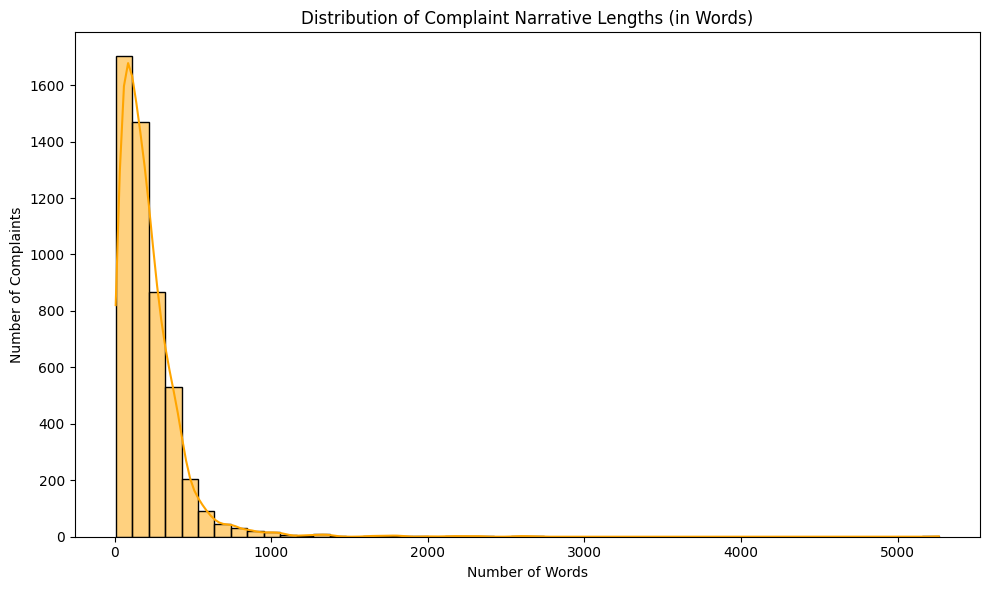

In [26]:
# 📉 Plot 2: Narrative Length Distribution
plt.figure(figsize=(10,6))
sns.histplot(df["word_count"], bins=50, color="orange", kde=True)
plt.title("Distribution of Complaint Narrative Lengths (in Words)")
plt.xlabel("Number of Words")
plt.ylabel("Number of Complaints")
plt.tight_layout()
plt.show()


In [27]:
# 🧾Basic stats
num_total = len(df)
avg_length = df["word_count"].mean()
max_length = df["word_count"].max()
min_length = df["word_count"].min()

print(f"Total complaints: {num_total}")
print(f"Average word count: {avg_length:.2f}")
print(f"Max: {max_length}, Min: {min_length}")

Total complaints: 5018
Average word count: 213.06
Max: 5264, Min: 6
